# Loading data and view basic details

In [1]:
## Load common libs
import numpy as np
import pandas as pd
import os
%matplotlib inline

In [2]:
## Read Data
data_file = os.path.join(os.path.pardir, 'data', 'raw', 'weather.csv')
df = pd.read_csv(data_file)

In [3]:
## Looks at dataframe shape to get number of rows and columns
df.shape

(8784, 5)

In [4]:
## Details of data type and space usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8783
Data columns (total 5 columns):
MONTH       8784 non-null int64
DAY         8784 non-null int64
TIME        8784 non-null int64
TEMP        8784 non-null float64
PRESSURE    8784 non-null int64
dtypes: float64(1), int64(4)
memory usage: 411.8 KB


In [5]:
## Get first 9 rows
df.head(9)

,MONTH,DAY,TIME,TEMP,PRESSURE
0,1,1,1,6.8,10207
1,1,1,2,5.8,10214
2,1,1,3,5.7,10220
3,1,1,4,6.0,10225
4,1,1,5,4.5,10230
5,1,1,6,2.0,10237
6,1,1,7,1.1,10242
7,1,1,8,0.7,10245
8,1,1,9,0.2,10248


In [6]:
##Get the last 12 lines
df.tail(12)

,MONTH,DAY,TIME,TEMP,PRESSURE
8772,12,366,13,5.0,10301
8773,12,366,14,5.2,10295
8774,12,366,15,5.1,10288
8775,12,366,16,4.6,10286
8776,12,366,17,4.1,10284
8777,12,366,18,3.7,10277
8778,12,366,19,3.5,10271
8779,12,366,20,3.5,10265
8780,12,366,21,3.4,10258
8781,12,366,22,3.0,10253


In [7]:
## Get so summary stats for numrical values
df.describe()

,MONTH,DAY,TIME,TEMP,PRESSURE
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,6.513661,183.500000,12.500000,10.768613,10159.254781
std,3.451430,105.660719,6.922581,6.420003,102.895130
min,1.000000,1.000000,1.000000,-6.500000,9812.000000
25%,4.000000,92.000000,6.750000,6.100000,10102.000000
50%,7.000000,183.500000,12.500000,10.200000,10169.000000
75%,10.000000,275.000000,18.250000,15.900000,10227.000000
max,12.000000,366.000000,24.000000,31.700000,10453.000000


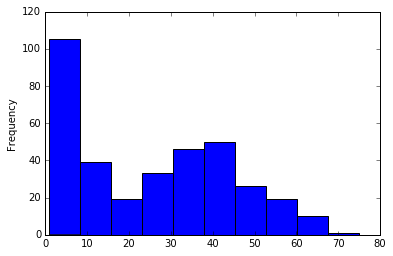

In [8]:
## Get details of frequency distribution of values and plot it
df['TEMP'].value_counts().plot(kind='hist');

In [9]:
## Copying df and using a smaller one
df1 = df.copy()
df = df.head(5)

# Selecting, Filtering & Sorting

In [10]:
## Select a colums  ## df is now just 5 rows
df['TEMP']

0    6.8
1    5.8
2    5.7
3    6.0
4    4.5
Name: TEMP, dtype: float64

In [11]:
## (!) Can't pass row count for a a row got get it.
#  ERROR  df[0]
### Can pass a slice to get it Slice selects ROWs
df[0:1]

,MONTH,DAY,TIME,TEMP,PRESSURE
0,1,1,1,6.8,10207


In [12]:
## Select a single values  by forst select a column and then a row
df['TEMP'][2]

5.7000000000000002

In [13]:
df

,MONTH,DAY,TIME,TEMP,PRESSURE
0,1,1,1,6.8,10207
1,1,1,2,5.8,10214
2,1,1,3,5.7,10220
3,1,1,4,6.0,10225
4,1,1,5,4.5,10230


In [14]:
## Using a list as label_index get the columns
df[['TEMP','PRESSURE']]

,TEMP,PRESSURE
0,6.8,10207
1,5.8,10214
2,5.7,10220
3,6.0,10225
4,4.5,10230


In [15]:
## Slice in any place will get us ROW and 
df[1:3]

,MONTH,DAY,TIME,TEMP,PRESSURE
1,1,1,2,5.8,10214
2,1,1,3,5.7,10220


In [16]:
## Slice in any place will get us ROW and 
## a label_list will get us Columns
df[1:3][['TEMP','PRESSURE']]

,TEMP,PRESSURE
1,5.8,10214
2,5.7,10220


Transpose and indexing

In [17]:
##Transpose the df
dft = df.T
dft

,0,1,2,3,4
MONTH,1.0,1.0,1.0,1,1.0
DAY,1.0,1.0,1.0,1,1.0
TIME,1.0,2.0,3.0,4,5.0
TEMP,6.8,5.8,5.7,6,4.5
PRESSURE,10207.0,10214.0,10220.0,10225,10230.0


In [18]:
## A slice will give the rows 
dft[3:]

,0,1,2,3,4
TEMP,6.8,5.8,5.7,6,4.5
PRESSURE,10207.0,10214.0,10220.0,10225,10230.0


In [19]:
## A label based slice will give us ROWs 
dft['TEMP':'PRESSURE']

,0,1,2,3,4
TEMP,6.8,5.8,5.7,6,4.5
PRESSURE,10207.0,10214.0,10220.0,10225,10230.0


In [20]:
### the Coulmns are now indexed
dft.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [21]:
### A single index will give the columns
dft[2]

MONTH           1.0
DAY             1.0
TIME            3.0
TEMP            5.7
PRESSURE    10220.0
Name: 2, dtype: float64

In [22]:
## A List of index will give us columns
dft[[2,3]]

,2,3
MONTH,1.0,1
DAY,1.0,1
TIME,3.0,4
TEMP,5.7,6
PRESSURE,10220.0,10225


In [23]:
## A slice  will give the rows only and list in index will get columns
df[2:][[3,4]]

,TEMP,PRESSURE
2,5.7,10220
3,6.0,10225
4,4.5,10230


# Sorting

In [24]:
df

,MONTH,DAY,TIME,TEMP,PRESSURE
0,1,1,1,6.8,10207
1,1,1,2,5.8,10214
2,1,1,3,5.7,10220
3,1,1,4,6.0,10225
4,1,1,5,4.5,10230


In [25]:
## Default sort is ROW index,, in this case nothing to sort
## axis=0 is ROW SORT
df.sort_index(ascending=False)


,MONTH,DAY,TIME,TEMP,PRESSURE
4,1,1,5,4.5,10230
3,1,1,4,6.0,10225
2,1,1,3,5.7,10220
1,1,1,2,5.8,10214
0,1,1,1,6.8,10207


In [26]:
## Set axis=1 to sort along clumn axis
df.sort_index(axis=1)

,DAY,MONTH,PRESSURE,TEMP,TIME
0,1,1,10207,6.8,1
1,1,1,10214,5.8,2
2,1,1,10220,5.7,3
3,1,1,10225,6.0,4
4,1,1,10230,4.5,5


In [27]:
## Sort columns wise sort with values
df.sort_values('TEMP')

,MONTH,DAY,TIME,TEMP,PRESSURE
4,1,1,5,4.5,10230
2,1,1,3,5.7,10220
1,1,1,2,5.8,10214
3,1,1,4,6.0,10225
0,1,1,1,6.8,10207


In [28]:
## Sort columns wise sort with values
df.sort_values(['TEMP','PRESSURE'])

,MONTH,DAY,TIME,TEMP,PRESSURE
4,1,1,5,4.5,10230
2,1,1,3,5.7,10220
1,1,1,2,5.8,10214
3,1,1,4,6.0,10225
0,1,1,1,6.8,10207


# Assigning Values

In [29]:
## Adding or assigning values to a cell
df['DAY'][1] += 5
df

,MONTH,DAY,TIME,TEMP,PRESSURE
0,1,1,1,6.8,10207
1,1,6,2,5.8,10214
2,1,1,3,5.7,10220
3,1,1,4,6.0,10225
4,1,1,5,4.5,10230


In [30]:
## Assign value to all the elements of a column
df['MONTH'] += 2
df

,MONTH,DAY,TIME,TEMP,PRESSURE
0,3,1,1,6.8,10207
1,3,6,2,5.8,10214
2,3,1,3,5.7,10220
3,3,1,4,6.0,10225
4,3,1,5,4.5,10230
